# Task: 1 Visualization Library Documentation

## Matplotlib

Matplotlib is a widely used foundational visualization library in Python. It provides low-level control over every element of a plot, making it suitable for exploratory data analysis, academic research, and production-quality static visualizations.

### Key Characteristics

- Produces static, high-quality plots  
- Offers fine-grained customization and control  
- Integrates seamlessly with NumPy and Pandas  
- Serves as the base library for higher-level visualization tools such as Seaborn  

### Key Features

- Supports a wide range of plot types including line plots, scatter plots, bar charts, histograms, and box plots  
- Provides full control over plot aesthetics and layout  
- Integrates seamlessly with NumPy and Pandas DataFrames  
- Suitable for exploratory data analysis and publication-quality visualizations  
- Serves as the base library for higher-level visualization tools such as Seaborn  

### Use Cases

- Data exploration and analysis  
- Business and analytical reports  
- Academic research papers  
- Visualization and technical documentation  


#### Loading and Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
rows = 900

# Categorical options
airlines = ["IndiGo", "Air India", "Vistara", "SpiceJet"]
sources = ["Delhi", "Mumbai", "Bangalore", "Hyderabad"]
destinations = ["Chennai", "Kolkata", "Pune", "Ahmedabad"]
flight_status = ["On Time", "Delayed"]
classes = ["Economy", "Business"]
day_type = ["Weekday", "Weekend"]

# Multipliers
airline_multiplier = {
    "IndiGo": 1.0,
    "SpiceJet": 0.95,
    "Air India": 1.15,
    "Vistara": 1.3
}

class_multiplier = {
    "Economy": 1.0,
    "Business": 1.6
}

day_multiplier = {
    "Weekday": 1.0,
    "Weekend": 1.1
}

# -------------------------------
# Generate base dataset
# -------------------------------
data = []

for _ in range(rows):
    duration = round(np.random.uniform(1, 6), 2)
    airline = np.random.choice(airlines)
    source = np.random.choice(sources)
    destination = np.random.choice(destinations)
    status = np.random.choice(flight_status, p=[0.75, 0.25])
    seat_class = np.random.choice(classes, p=[0.8, 0.2])
    day = np.random.choice(day_type, p=[0.7, 0.3])

    base_fare = np.random.uniform(2000, 3000)
    per_hour_cost = np.random.uniform(1200, 2200)

    price = base_fare + duration * per_hour_cost
    price *= airline_multiplier[airline]
    price *= class_multiplier[seat_class]
    price *= day_multiplier[day]

    noise = np.random.normal(0, 400)
    final_price = max(2500, price + noise)

    data.append([
        duration,
        int(final_price),
        airline,
        source,
        destination,
        status,
        seat_class,
        day
    ])

# -------------------------------
# Create DataFrame
# -------------------------------
df = pd.DataFrame(data, columns=[
    "Flight_Duration_Hours",
    "Ticket_Price_INR",
    "Airline",
    "Source",
    "Destination",
    "Flight_Status",
    "Class",
    "Day_Type"
])

# -------------------------------
# Add additional columns
# -------------------------------
df["Seats_Available"] = np.random.randint(120, 220, size=len(df))

df["Seats_Booked"] = np.random.randint(60, 220, size=len(df))
df["Seats_Booked"] = df.apply(
    lambda x: min(x["Seats_Booked"], x["Seats_Available"]), axis=1
)

df["Passenger_Rating"] = np.round(
    np.random.uniform(2.5, 5.0, size=len(df)), 1
)


In [2]:
df.head()   

,Flight_Duration_Hours,Ticket_Price_INR,Airline,Source,Destination,Flight_Status,Class,Day_Type,Seats_Available,Seats_Booked,Passenger_Rating
0,2.87,6507,IndiGo,Bangalore,Pune,Delayed,Economy,Weekday,171,147,3.3
1,4.25,8411,IndiGo,Mumbai,Ahmedabad,Delayed,Economy,Weekday,141,141,3.0
2,3.62,7841,SpiceJet,Delhi,Chennai,On Time,Economy,Weekday,123,123,3.7
3,2.91,7595,SpiceJet,Hyderabad,Chennai,On Time,Economy,Weekday,125,67,3.2
4,5.83,15073,Air India,Mumbai,Chennai,On Time,Economy,Weekday,157,99,3.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Flight_Duration_Hours  900 non-null    float64
 1   Ticket_Price_INR       900 non-null    int64  
 2   Airline                900 non-null    object 
 3   Source                 900 non-null    object 
 4   Destination            900 non-null    object 
 5   Flight_Status          900 non-null    object 
 6   Class                  900 non-null    object 
 7   Day_Type               900 non-null    object 
 8   Seats_Available        900 non-null    int32  
 9   Seats_Booked           900 non-null    int64  
 10  Passenger_Rating       900 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 74.0+ KB


In [4]:
df.describe()

,Flight_Duration_Hours,Ticket_Price_INR,Seats_Available,Seats_Booked,Passenger_Rating
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,3.487100,10555.048889,170.184444,128.373333,3.745000
std,1.427637,4369.539172,29.150779,37.563066,0.722395
min,1.000000,2739.000000,120.000000,60.000000,2.500000
25%,2.270000,7320.750000,145.000000,99.000000,3.100000
50%,3.460000,9799.000000,171.000000,129.000000,3.750000
75%,4.690000,12839.000000,196.000000,156.000000,4.400000
max,6.000000,32276.000000,219.000000,213.000000,5.000000


## Key Observations

- The dataset contains no missing values.
- Multiple airlines and routes are represented.
- Both numerical and categorical variables are present in the dataset.


## Matplotlib Setup

In [5]:
import matplotlib.pyplot as plt
plt.style.use("default")

## Scatter Plot (Matplotlib)

### Plot Type  
Scatter Plot

---

### Description  

A scatter plot in Matplotlib is used to visualize the relationship between two continuous numerical variables using individual data points. Each point on the plot represents a single observation from the dataset.

Matplotlib supports the creation of scatter plots using two approaches:

- `plt.scatter()` — a dedicated function specifically designed for scatter plots  
- `plt.plot()` — using markers without connecting lines  

In this project, the `plt.scatter()` function is used for improved clarity, semantic correctness, and readability.

---

### When to Use a Scatter Plot  

Scatter plots are commonly used to:

- Examine relationships between two numerical variables  
- Identify patterns, clusters, and correlations  
- Detect potential outliers in the data  
- Visualize raw, unaggregated observations  
- Perform exploratory data analysis prior to statistical modeling or machine learning  

---

### Dataset Variables Used  

- **X-axis:** `Flight_Duration_Hours`  
- **Y-axis:** `Ticket_Price_INR`  

Each data point represents a single flight record from the dataset.

---

### Matplotlib Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `x` | Values plotted on the horizontal axis |
| `y` | Values plotted on the vertical axis |
| `color` | Specifies the color of the data points |
| `alpha` | Controls transparency to reduce overplotting |
| `figure(figsize)` | Sets the dimensions of the plot |
| `grid(True)` | Enhances readability using background grid lines |

---



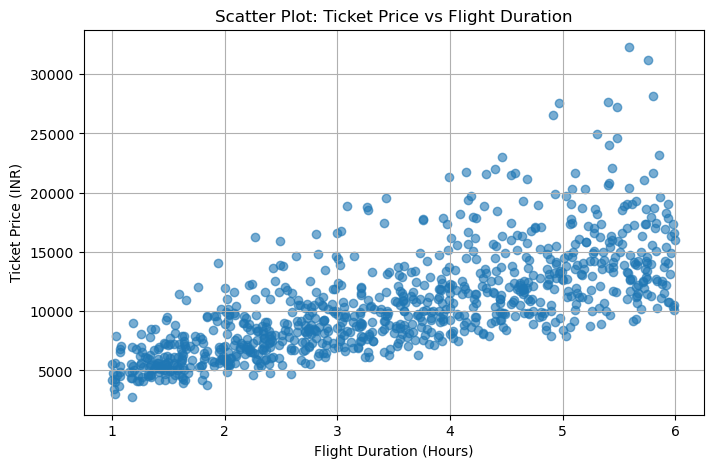

In [6]:
plt.figure(figsize=(8, 5))

plt.scatter(
    df["Flight_Duration_Hours"],
    df["Ticket_Price_INR"],
    color="tab:blue",
    alpha=0.6
)

plt.xlabel("Flight Duration (Hours)")
plt.ylabel("Ticket Price (INR)")
plt.title("Scatter Plot: Ticket Price vs Flight Duration")
plt.grid(True)

plt.show()


## Bar Chart (Matplotlib)

### Plot Type  
Bar Chart

---

### Description  

A bar chart in Matplotlib is used to compare aggregated numerical values across categorical variables. Each bar represents a distinct category, and its height corresponds to a computed statistic such as the mean, sum, or count.

Bar charts are particularly effective for visualizing and comparing discrete groups within a dataset.

---

### When to Use a Bar Chart  

Bar charts are commonly used to:

- Compare averages or totals across categorical variables  
- Visualize grouped or aggregated summaries  
- Present categorical comparisons in reports and dashboards  

---

### Dataset Variables Used  

- **Category (X-axis):** `Airline`  
- **Value (Y-axis):** Average `Ticket_Price_INR`  

---

### Matplotlib Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `plt.bar()` | Creates vertical bars representing each category |
| `index` | Specifies the categorical labels on the X-axis |
| `values` | Represents the aggregated numerical values |
| `color` | Sets the color of the bars |
| `grid(axis="y")` | Improves readability of values along the Y-axis |

---



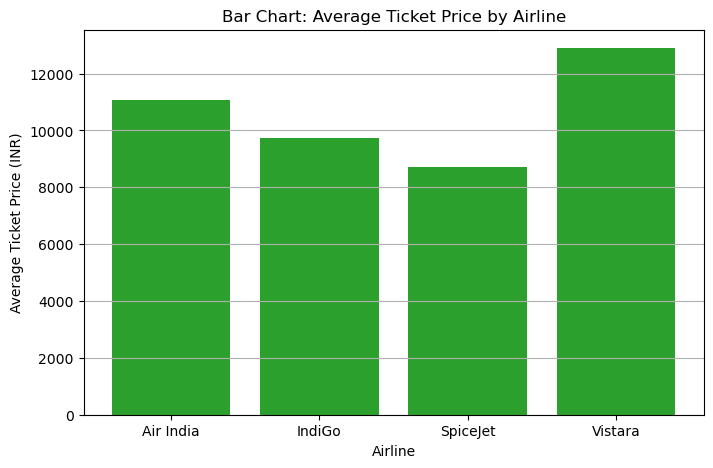

In [7]:
avg_price_airline = df.groupby("Airline")["Ticket_Price_INR"].mean()

plt.figure(figsize=(8, 5))
plt.bar(
    avg_price_airline.index,
    avg_price_airline.values,
    color="tab:green"
)

plt.xlabel("Airline")
plt.ylabel("Average Ticket Price (INR)")
plt.title("Bar Chart: Average Ticket Price by Airline")
plt.grid(axis="y")

plt.show()


## Histogram (Matplotlib)

### Plot Type  
Histogram

---

### Description  

A histogram in Matplotlib is used to visualize the distribution of a single numerical variable. The data is divided into contiguous intervals known as *bins*, and the frequency of observations within each bin is represented using bars.

Histograms are particularly useful for understanding the spread, central tendency, skewness, and concentration of values in a dataset.

---

### When to Use a Histogram  

Histograms are commonly used to:

- Analyze the distribution of numerical data  
- Identify skewness or asymmetry in values  
- Detect potential outliers  
- Examine frequency patterns within the dataset  

---

### Dataset Variable Used  

- **Numerical Variable:** `Ticket_Price_INR`  

---

### Matplotlib Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `bins` | Specifies the number of intervals used to group the data |
| `edgecolor` | Enhances visual separation between bins |
| `color` | Sets the fill color of the histogram bars |
| `plt.hist()` | Function used to generate the histogram |

---



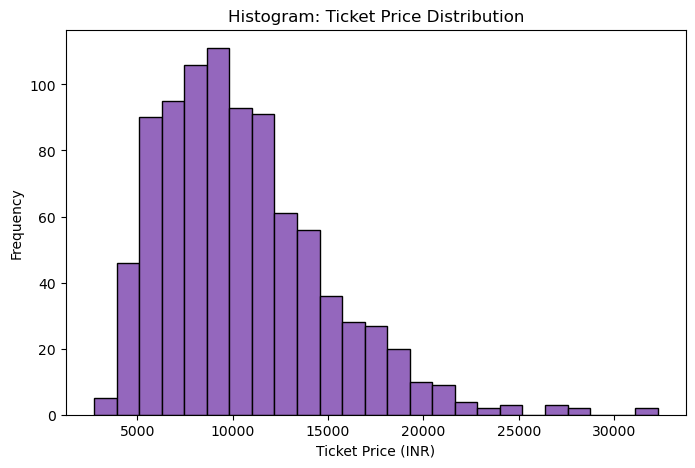

In [8]:
plt.figure(figsize=(8, 5))

plt.hist(
    df["Ticket_Price_INR"],
    bins=25,
    color="tab:purple",
    edgecolor="black"
)

plt.xlabel("Ticket Price (INR)")
plt.ylabel("Frequency")
plt.title("Histogram: Ticket Price Distribution")

plt.show()


## Box Plot (Matplotlib)

### Plot Type  
Box Plot

---

### Description  

A box plot in Matplotlib provides a compact statistical summary of a numerical variable using the median, quartiles, and potential outliers. It visually represents the distribution, spread, and symmetry of the data.

Box plots are especially effective for comparing distributions across different categorical groups.

---

### When to Use a Box Plot  

Box plots are commonly used to:

- Compare numerical distributions across categories  
- Identify potential outliers in the data  
- Summarize data spread and central tendency  
- Perform group-wise statistical comparisons  

---

### Dataset Variables Used  

- **Numerical Variable:** `Passenger_Rating`  
- **Category:** `Flight_Status`  

---

### Matplotlib Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `column` | Specifies the numerical variable to be plotted |
| `by` | Defines the categorical variable used for grouping |
| `plt.suptitle("")` | Removes the default Matplotlib title for cleaner presentation |
| `grid(True)` | Enhances plot readability using grid lines |

---



<Figure size 800x500 with 0 Axes>

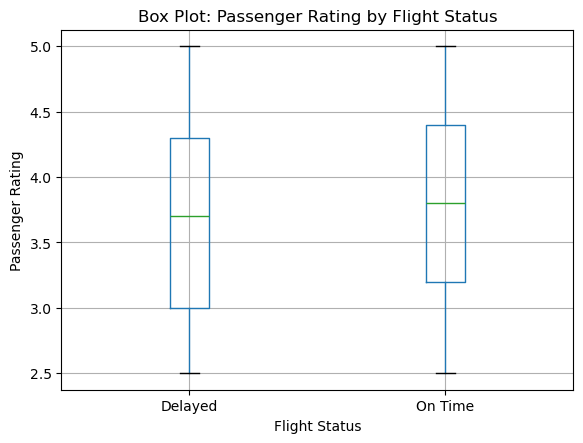

In [9]:
plt.figure(figsize=(8, 5))

df.boxplot(
    column="Passenger_Rating",
    by="Flight_Status"
)

plt.xlabel("Flight Status")
plt.ylabel("Passenger Rating")
plt.title("Box Plot: Passenger Rating by Flight Status")
plt.suptitle("")
plt.grid(True)

plt.show()


## Pie Chart (Matplotlib)

### Plot Type  
Pie Chart

---

### Description  

A pie chart in Matplotlib is used to represent categorical data as proportions of a whole. Each slice of the chart corresponds to a category’s percentage contribution relative to the total dataset.

Pie charts are most effective for emphasizing relative distribution rather than precise numerical comparisons.

---

### When to Use a Pie Chart  

Pie charts are commonly used to:

- Display proportions or percentage share  
- Visualize simple categorical distributions  
- Present high-level summary information in reports  

---

### Dataset Variable Used  

- **Categorical Variable:** `Flight_Status`  

---

### Matplotlib Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `labels` | Specifies category names displayed on the chart |
| `autopct` | Formats and displays percentage values on slices |
| `startangle` | Rotates the chart for improved alignment and readability |
| `plt.pie()` | Function used to generate the pie chart |

---



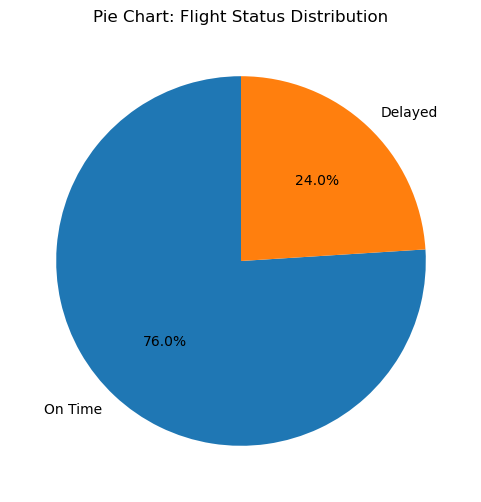

In [10]:
status_counts = df["Flight_Status"].value_counts()

plt.figure(figsize=(6, 6))

plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Pie Chart: Flight Status Distribution")

plt.show()


## Area Plot (Matplotlib)

### Plot Type  
Area Plot

---

### Description  

An area plot in Matplotlib is similar to a line plot, with the key distinction that the area between the plotted line and the axis is filled. This visualization is primarily used to represent cumulative values or the magnitude of change across a continuous variable.

In Matplotlib, area plots are created using the `fill_between()` function.

---

### When to Use an Area Plot  

Area plots are commonly used to:

- Visualize cumulative trends over a continuous variable  
- Represent volume or magnitude rather than precise individual values  
- Highlight differences in scale across ranges of data  

---

### Dataset Variables Used  

- **X-axis:** `Flight_Duration_Hours`  
- **Y-axis:** Average `Ticket_Price_INR` (aggregated)  

---

### Matplotlib Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `fill_between()` | Fills the area under the plotted curve |
| `alpha` | Controls transparency of the filled area |
| `color` | Specifies the fill color |
| `linewidth` | Defines the thickness of the line outlining the area |

---



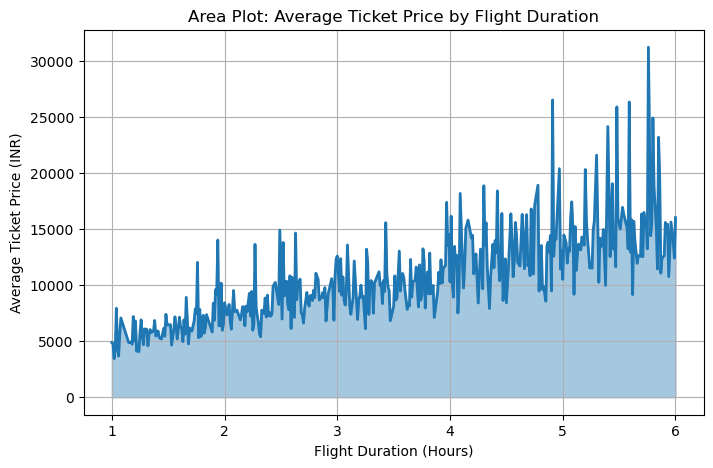

In [11]:
avg_price = df.groupby("Flight_Duration_Hours")["Ticket_Price_INR"].mean()

plt.figure(figsize=(8, 5))

plt.fill_between(
    avg_price.index,
    avg_price.values,
    color="tab:blue",
    alpha=0.4
)

plt.plot(
    avg_price.index,
    avg_price.values,
    color="tab:blue",
    linewidth=2
)

plt.xlabel("Flight Duration (Hours)")
plt.ylabel("Average Ticket Price (INR)")
plt.title("Area Plot: Average Ticket Price by Flight Duration")
plt.grid(True)

plt.show()


## Heatmap (Matplotlib)

### Plot Type  
Heatmap

---

### Description  

A heatmap in Matplotlib represents numerical values using color intensity within a matrix layout. Each cell corresponds to the magnitude of a value at the intersection of two categorical dimensions, enabling quick visual comparison across groups.

In Matplotlib, heatmaps are typically created using functions such as `imshow()` or `pcolor()` in combination with a color-mapping scheme.

---

### When to Use a Heatmap  

Heatmaps are commonly used to:

- Visualize relationships between two categorical variables  
- Compare aggregated numerical values across category combinations  
- Identify patterns, trends, or concentration zones within the data  

---

### Dataset Variables Used  

- **Rows:** `Airline`  
- **Columns:** `Day_Type`  
- **Values:** Average `Ticket_Price_INR`  

---

### Matplotlib Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `imshow()` | Displays the data as a color-mapped image |
| `cmap` | Defines the color mapping scheme used for intensity representation |
| `colorbar()` | Displays the scale that maps colors to numerical values |
| `xticks / yticks` | Aligns and labels axis categories for readability |

---



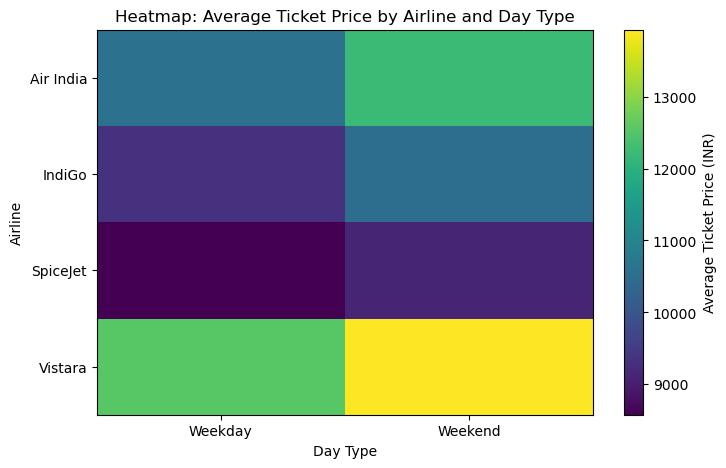

In [12]:
# Create pivot table for heatmap
heatmap_data = df.pivot_table(
    values="Ticket_Price_INR",
    index="Airline",
    columns="Day_Type",
    aggfunc="mean"
)

plt.figure(figsize=(8, 5))

plt.imshow(
    heatmap_data,
    cmap="viridis",
    aspect="auto"
)

plt.colorbar(label="Average Ticket Price (INR)")

plt.xticks(
    ticks=range(len(heatmap_data.columns)),
    labels=heatmap_data.columns
)

plt.yticks(
    ticks=range(len(heatmap_data.index)),
    labels=heatmap_data.index
)

plt.xlabel("Day Type")
plt.ylabel("Airline")
plt.title("Heatmap: Average Ticket Price by Airline and Day Type")

plt.show()


## Seaborn Documentation

### What is Seaborn?

Seaborn is a high-level Python visualization library built on top of Matplotlib. It is specifically designed for statistical data visualization and integrates seamlessly with Pandas DataFrames, enabling efficient and expressive plotting with minimal code.

Seaborn abstracts many low-level plotting details, allowing users to focus on data insights rather than plot configuration.

---

### Key Features

- Provides a simple and high-level application programming interface (API)  
- Includes built-in themes and color palettes for visually appealing plots  
- Automatically handles statistical aggregation and confidence intervals  
- Offers strong support for categorical data visualization  

---

### Role of Seaborn in Data Analysis

Seaborn is particularly useful for exploratory data analysis, where rapid generation of insightful and aesthetically pleasing visualizations is required. It complements Matplotlib by simplifying complex plotting tasks while still allowing Matplotlib-level customization when needed.

### Typical Use Cases

Seaborn is commonly used for the following data visualization and analysis tasks:

- Exploratory Data Analysis (EDA) to quickly identify patterns and relationships  
- Statistical comparisons between numerical variables across categories  
- Distribution analysis to understand data spread, skewness, and density  
- Category-wise visualization for comparing grouped data effectively  


In [13]:
import pandas as pd
import numpy as np

np.random.seed(42)
rows = 1400

categories = {
    "Electronics": (1500, 6000),
    "Fashion": (500, 4000),
    "Home & Kitchen": (800, 4500),
    "Beauty": (300, 2500),
    "Books": (200, 1500)
}

payment_modes = ["Credit Card", "Debit Card", "UPI", "Cash on Delivery"]
customer_type = ["New", "Returning"]
delivery_status = ["Delivered", "Returned", "Cancelled"]

data = []

for _ in range(rows):
    category = np.random.choice(list(categories.keys()))
    price_min, price_max = categories[category]

    price = np.random.uniform(price_min, price_max)
    quantity = np.random.randint(1, 5)
    discount = np.random.uniform(0, 30)

    # --- Rating logic (realistic) ---
    base_rating = 3.5
    price_effect = (price - 2000) / 4000        # weak positive correlation
    noise = np.random.normal(0, 0.4)

    rating = base_rating + price_effect + noise
    rating = np.clip(rating, 1.5, 5.0)

    payment = np.random.choice(payment_modes)
    customer = np.random.choice(customer_type, p=[0.4, 0.6])
    status = np.random.choice(delivery_status, p=[0.78, 0.12, 0.10])

    data.append([
        category,
        round(price, 2),
        quantity,
        round(discount, 1),
        round(rating, 2),
        payment,
        customer,
        status
    ])

df = pd.DataFrame(data, columns=[
    "Product_Category",
    "Product_Price",
    "Quantity",
    "Discount_Percent",
    "Customer_Rating",
    "Payment_Mode",
    "Customer_Type",
    "Delivery_Status"
])


## Seaborn Setup

Seaborn is built on top of Matplotlib and provides a high-level interface for creating statistical visualizations. Before generating plots, the required libraries must be imported and the visualization environment configured.

---

### Library Imports

Seaborn is typically imported using the alias `sns`. Since it relies on Matplotlib for rendering, Matplotlib is also imported.



In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")


## Scatter Plot (Seaborn)

### Plot Type  
Scatter Plot

---

### Description  

A scatter plot in Seaborn is used to visualize the relationship between two continuous numerical variables. It extends Matplotlib’s scatter plot functionality by supporting semantic mappings such as color (`hue`), size, and style, which allow additional dimensions of information to be encoded within the visualization.

---

### When to Use  

Seaborn scatter plots are commonly used to:

- Explore relationships between numerical variables  
- Visualize raw, unaggregated data points  
- Detect clusters, trends, or spread in the data  

---

### Dataset Variables Used  

- **X-axis:** `Product_Price`  
- **Y-axis:** `Customer_Rating`  

---

### Seaborn Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `data` | Specifies the Pandas DataFrame used as the data source |
| `x`, `y` | Define the numerical variables mapped to the axes |
| `hue` | Enables grouping and color-coding by a categorical variable |
| `alpha` | Controls transparency to reduce overplotting |
| `scatterplot()` | Function used to generate the scatter plot |

---


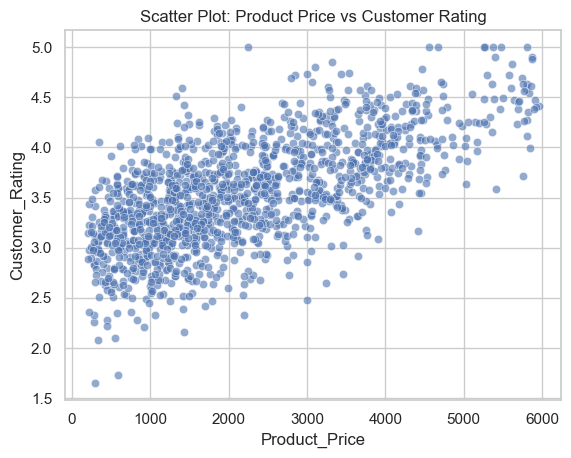

In [15]:
sns.scatterplot(
    data=df,
    x="Product_Price",
    y="Customer_Rating",
    alpha=0.6
)

plt.title("Scatter Plot: Product Price vs Customer Rating")
plt.show()


## Line Plot (Seaborn)

### Plot Type  
Line Plot

---

### Description  

A line plot in Seaborn is used to visualize trends across ordered or discrete values. Unlike Matplotlib, Seaborn automatically computes aggregate statistics—such as the mean—at each value on the X-axis. By default, confidence intervals are also displayed, providing additional insight into variability.

---

### When to Use  

Seaborn line plots are commonly used to:

- Show trends across ordered or discrete variables  
- Visualize aggregated behavior in the data  
- Compare average changes across categories or groups  

---

### Dataset Variables Used  

- **X-axis:** `Quantity`  
- **Y-axis:** Aggregated `Product_Price`  

---

### Seaborn Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `estimator` | Specifies the aggregation function (mean by default) |
| `ci` | Controls the display of confidence intervals |
| `lineplot()` | Function used to generate the line plot |
| `markers` | Displays markers at data points along the line |

---


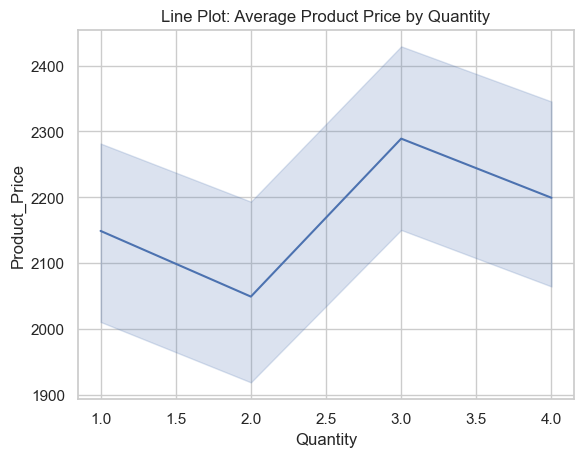

In [16]:
sns.lineplot(
    data=df,
    x="Quantity",
    y="Product_Price",
    markers=True
)

plt.title("Line Plot: Average Product Price by Quantity")
plt.show()


## Bar Plot (Seaborn)

### Plot Type  
Bar Plot

---

### Description  

A bar plot in Seaborn is used to visualize aggregated numerical values across categorical variables. By default, Seaborn computes the mean for each category and displays error bars representing confidence intervals, providing both central tendency and variability information.

---

### When to Use  

Seaborn bar plots are commonly used to:

- Perform category-wise comparisons  
- Present summary-level insights  
- Visualize aggregated statistics with variability indicators  

---

### Dataset Variables Used  

- **X-axis:** `Product_Category`  
- **Y-axis:** `Product_Price`  

---

### Seaborn Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `estimator` | Specifies the aggregation method applied to the data |
| `ci` | Controls the display of confidence intervals as error bars |
| `palette` | Defines the color theme used for the bars |
| `barplot()` | Function used to generate the bar plot |

---

### Insight  

The bar plot reveals differences in average product prices across categories. Categories with higher mean prices stand out clearly, while confidence intervals provide context regarding price variability within each category.


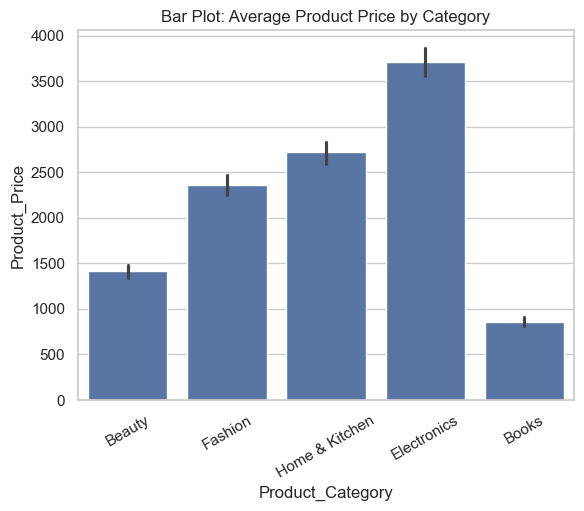

In [17]:
sns.barplot(
    data=df,
    x="Product_Category",
    y="Product_Price"
)

plt.title("Bar Plot: Average Product Price by Category")
plt.xticks(rotation=30)
plt.show()


## Histogram / Distribution Plot (Seaborn)

### Plot Type  
Histogram with Kernel Density Estimate (KDE)

---

### Description  

A histogram in Seaborn is used to visualize the distribution of a numerical variable by grouping values into intervals known as bins. The optional Kernel Density Estimate (KDE) overlays a smooth probability density curve, providing a clearer view of the underlying distribution pattern.

This combination helps in understanding both frequency and distribution shape.

---

### When to Use  

Seaborn histogram and distribution plots are commonly used to:

- Analyze the distribution of numerical variables  
- Detect skewness or asymmetry in the data  
- Identify concentration and spread of values  

---

### Dataset Variable Used  

- **Numerical Variable:** `Product_Price`  

---

### Seaborn Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `bins` | Specifies the number of intervals used to group the data |
| `kde` | Enables the Kernel Density Estimate overlay |
| `histplot()` | Function used to generate the histogram |

---


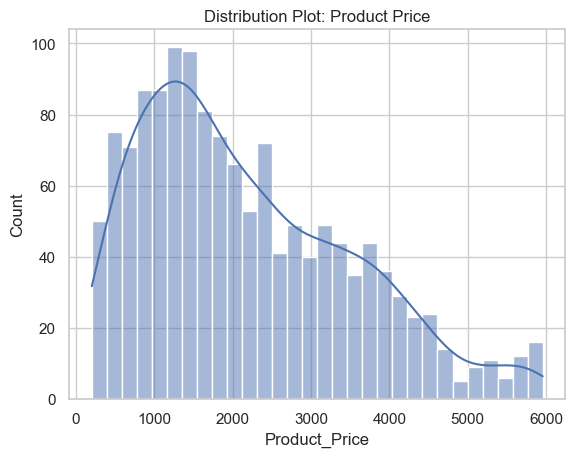

In [18]:
sns.histplot(
    data=df,
    x="Product_Price",
    bins=30,
    kde=True
)

plt.title("Distribution Plot: Product Price")
plt.show()


## Box Plot (Seaborn)

### Plot Type  
Box Plot

---

### Description  

A box plot in Seaborn is used to visualize the distribution of a numerical variable across different categories. It summarizes the data using the median, quartiles, and potential outliers, providing a clear statistical overview of group-wise distributions.

---

### When to Use  

Seaborn box plots are commonly used to:

- Compare numerical distributions across categorical groups  
- Identify potential outliers in the data  
- Analyze data spread and central tendency  

---

### Dataset Variables Used  

- **X-axis:** `Delivery_Status`  
- **Y-axis:** `Customer_Rating`  

---

### Seaborn Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `x`, `y` | Define the categorical and numerical variables |
| `boxplot()` | Function used to generate the box plot |
| `palette` | Specifies the color scheme applied to the plot |

---



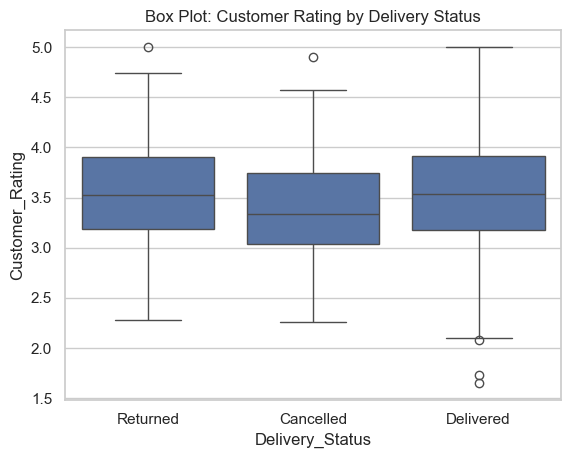

In [19]:
sns.boxplot(
    data=df,
    x="Delivery_Status",
    y="Customer_Rating"
)

plt.title("Box Plot: Customer Rating by Delivery Status")
plt.show()


## Heatmap (Seaborn)

### Plot Type  
Heatmap

---

### Description  

A heatmap in Seaborn represents numerical values using color intensity within a matrix layout. Each cell corresponds to the magnitude of a value at the intersection of two categorical dimensions, enabling quick and compact comparison across categories.

---

### When to Use  

Seaborn heatmaps are commonly used to:

- Compare aggregated numerical values across two categorical variables  
- Visualize compact comparison matrices  
- Identify patterns, trends, or concentration zones within the data  

---

### Dataset Variables Used  

- **Rows:** `Product_Category`  
- **Columns:** `Customer_Type`  
- **Values:** Mean `Product_Price`  

---

### Seaborn Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `annot` | Displays numerical values within heatmap cells |
| `cmap` | Defines the color mapping scheme |
| `heatmap()` | Function used to generate the heatmap |

---


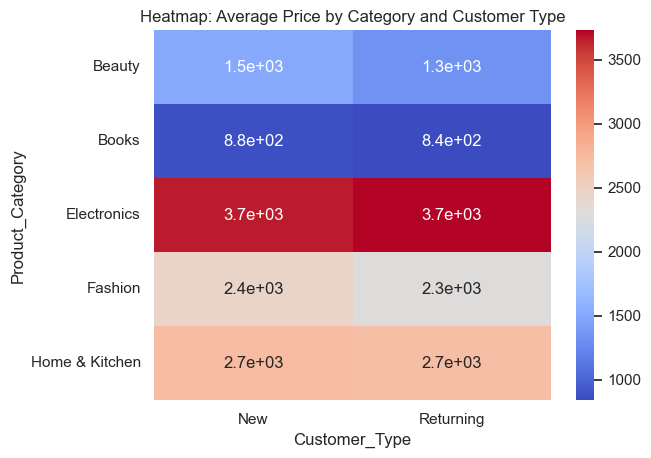

In [20]:
pivot_data = df.pivot_table(
    values="Product_Price",
    index="Product_Category",
    columns="Customer_Type",
    aggfunc="mean"
)

sns.heatmap(
    pivot_data,
    annot=True,
    cmap="coolwarm"
)

plt.title("Heatmap: Average Price by Category and Customer Type")
plt.show()


---
---
## Comparison of Python Visualization Libraries:

This section compares Matplotlib and Seaborn across key criteria commonly used to evaluate Python visualization libraries in data analysis and reporting workflows.

---

### Comparison Table

| Aspect | Matplotlib | Seaborn |
|------|-----------|---------|
| Ease of Use | Moderate | Easy |
| Customization | Very High | Medium |
| Interactivity | None (static) | None (static) |
| Performance with Large Datasets | Good | Good (slightly slower) |
| Default Styling | Basic | Excellent |
| Statistical Plot Support | Limited | Strong |

---

### Ease of Use

Matplotlib provides low-level control over visual elements, which often requires more code to produce polished visualizations.

Seaborn offers a high-level interface with sensible defaults, allowing users—especially beginners—to create visually appealing plots with minimal effort.

---

### Customization Options

Matplotlib excels in customization, enabling precise control over every component of a plot, including axes, ticks, fonts, colors, and layouts.

Seaborn supports customization but follows an opinionated design philosophy. Advanced customization typically requires direct use of Matplotlib functions.

---

### Interactivity

Both Matplotlib and Seaborn generate static visualizations.

They are best suited for reports, documentation, and exploratory analysis rather than interactive dashboards.

---

### Performance with Large Datasets

Matplotlib efficiently handles large datasets, particularly when working with aggregated data.

Seaborn, built on top of Matplotlib, introduces slight overhead but performs well for most medium to large datasets.

---

### Use-Case Summary

**Use Matplotlib when:**
- Fine-grained control over visual elements is required  
- Custom or publication-quality figures are needed  
- Building foundational knowledge of data visualization  

**Use Seaborn when:**
- Quick and clean statistical visualizations are required  
- Working directly with Pandas DataFrames  
- Visual appeal with minimal code is a priority  

---
---

## Plotly Overview

Plotly is a Python visualization library designed for creating interactive, web-based graphics. It enables features such as hover tooltips, zooming, panning, filtering, and dynamic legends, making it well-suited for interactive data exploration and dashboards.

Plotly visualizations can be rendered directly in Jupyter Notebooks and web applications, providing an engaging user experience beyond static plots.

---

### Key Characteristics

- Interactive visualizations by default  
- Supports zooming, hovering, and dynamic filtering  
- Well-suited for dashboards and web-based applications  
- Provides a clean and high-level API through `plotly.express`  

---

### Role of Plotly in Data Visualization

Plotly is particularly effective when interactivity is required to explore data in detail. It complements static visualization libraries such as Matplotlib and Seaborn by enabling user-driven exploration and presentation of insights in dashboards and web interfaces.


In [21]:
import pandas as pd
import numpy as np

np.random.seed(42)
rows = 900

brands = ["Toyota", "Hyundai", "Honda", "Tata", "Mahindra", "Kia"]
fuel_type = ["Petrol", "Diesel", "Electric", "Hybrid"]
transmission = ["Manual", "Automatic"]

data = []

for _ in range(rows):
    brand = np.random.choice(brands)
    engine_cc = np.random.randint(800, 3000)
    mileage = round(np.random.uniform(10, 35), 1)
    price = round(engine_cc * np.random.uniform(8, 14), 2)
    fuel = np.random.choice(fuel_type)
    trans = np.random.choice(transmission)
    rating = round(np.clip(np.random.normal(4.0, 0.5), 2.5, 5.0), 1)

    data.append([brand, engine_cc, mileage, price, fuel, trans, rating])

df_auto = pd.DataFrame(data, columns=[
    "Brand", "Engine_CC", "Mileage_kmpl",
    "Price_Lakhs", "Fuel_Type",
    "Transmission", "Customer_Rating"
])


## Scatter Plot (Plotly)

### Plot Type  
Interactive Scatter Plot

---

### Description  

A scatter plot in Plotly is used to visualize the relationship between numerical variables with built-in interactivity. Unlike static plots, Plotly scatter plots support hover tooltips, zooming, panning, and dynamic legends, allowing users to inspect individual data points in detail.

---

### When to Use  

Plotly scatter plots are commonly used to:

- Explore relationships between numerical variables  
- Interactively inspect individual data values  
- Create dashboard-ready and presentation-quality visuals  

---

### Dataset Variables Used  

- **X-axis:** `Engine_CC`  
- **Y-axis:** `Price_Lakhs`  
- **Color grouping:** `Fuel_Type`  

---

### Plotly Parameters Explained  

| Parameter | Purpose |
|---------|--------|
| `x`, `y` | Define the numerical variables mapped to the axes |
| `color` | Enables category-based color grouping |
| `title` | Sets the plot heading |
| `px.scatter()` | Function used to generate the interactive scatter plot |

---

### Insight  

The interactive scatter plot reveals how vehicle price varies with engine capacity across different fuel types. Color grouping highlights distinct pricing patterns, while interactivity allows detailed examination of individual observations.


In [22]:
import plotly.express as px

fig = px.scatter(
    df_auto,
    x="Engine_CC",
    y="Price_Lakhs",
    color="Fuel_Type",
    title="Engine Capacity vs Price"
)

fig.show()


## Bar Chart (Plotly)

### Plot Type  
Interactive Bar Chart

---

### Description  

A bar chart in Plotly is used to visualize aggregated numerical values across categorical variables. It supports interactive features such as hover tooltips, dynamic legends, and zooming, which enhance user-driven exploration of summary-level data.

---

### When to Use  

Plotly bar charts are commonly used to:

- Perform brand-wise comparisons  
- Present aggregated insights interactively  
- Create report-ready and dashboard-friendly visualizations  

---

### Dataset Variables Used  

- **X-axis:** `Brand`  
- **Y-axis:** Average `Price_Lakhs`  

---

### Insight  

The interactive bar chart highlights differences in average vehicle prices across brands. Hover functionality enables precise value inspection, while interactive legends improve clarity when comparing multiple categories.


In [23]:
fig = px.bar(
    df_auto,
    x="Brand",
    y="Price_Lakhs",
    title="Average Car Price by Brand",
    color="Brand"
)

fig.show()


---
---
## Bokeh Documentation

### Overview

Bokeh is a Python visualization library designed for creating interactive and scalable visualizations for modern web browsers. It focuses on providing high-performance interactivity while allowing visualizations to be embedded directly into web applications, dashboards, or Jupyter Notebooks.

Bokeh is particularly suited for handling large datasets and enabling real-time data interaction.

---

### Key Features

- Interactive visualizations rendered in web browsers  
- Supports hover tools, zooming, panning, and selection  
- Capable of handling large and streaming datasets  
- Integrates well with Pandas and NumPy  
- Allows embedding plots in web applications and dashboards  

---

### Typical Use Cases

Bokeh is commonly used for:

- Interactive dashboards and web-based data applications  
- Exploratory data analysis with large datasets  
- Real-time or streaming data visualization  
- Custom interactive plots requiring fine control over behavior  

---

### Interactivity Support

Bokeh provides built-in interactive tools such as:

- Hover tooltips for data inspection  
- Zoom and pan controls  
- Linked brushing and selections  
- Custom JavaScript callbacks for advanced interactions  

These features make Bokeh well-suited for user-driven data exploration.

---

### Comparison with Other Libraries

- **Compared to Matplotlib:** Bokeh focuses on interactivity rather than static plots  
- **Compared to Seaborn:** Bokeh prioritizes web-ready interactive visuals over statistical abstractions  
- **Compared to Plotly:** Bokeh offers deeper customization and server-based interactivity, while Plotly emphasizes ease of use  

---

### Role of Bokeh in Data Visualization

Bokeh is ideal when interactive behavior and scalability are critical requirements. It complements static and statistical visualization libraries by enabling advanced browser-based visual analytics.

---

### Summary

Bokeh is a powerful tool for creating interactive, web-friendly visualizations in Python. Its emphasis on interactivity, performance, and flexibility makes it a strong choice for dashboards, real-time analytics, and large-scale data visualization projects.


In [24]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import pandas as pd
import numpy as np

np.random.seed(42)
rows = 700

medicines = ["Paracetamol", "Amoxicillin", "Ibuprofen", "Cetirizine", "Azithromycin"]
category = ["OTC", "Prescription"]

data = []

for _ in range(rows):
    med = np.random.choice(medicines)
    units = np.random.randint(10, 300)
    price = round(np.random.uniform(20, 500), 2)
    stock = np.random.randint(50, 1000)
    cat = np.random.choice(category)
    rating = round(np.clip(np.random.normal(4.2, 0.4), 3.0, 5.0), 1)

    data.append([med, units, price, stock, cat, rating])

df_pharma = pd.DataFrame(data, columns=[
    "Medicine", "Units_Sold", "Price_INR",
    "Stock_Available", "Category",
    "Customer_Rating"
])


## Scatter Plot (Bokeh)

### Plot Type  
Interactive Scatter Plot

---

### Description  

A scatter plot in Bokeh is used to visualize the relationship between two numerical variables using interactive glyphs rendered directly in web browsers. Bokeh scatter plots support rich interactivity such as hover tooltips, zooming, panning, and selection, making them suitable for advanced visual analytics.

---

### When to Use  

Bokeh scatter plots are commonly used to:

- Build web-based visual analytics applications  
- Visualize real-time or server-driven data streams  
- Enable interactive inspection of large datasets  

---

### Dataset Variables Used  

- **X-axis:** `Price_INR`  
- **Y-axis:** `Units_Sold`  

---

### Insight  

The interactive scatter plot highlights the relationship between product pricing and sales volume. Interactivity allows users to examine individual data points, identify trends, and explore potential outliers in real time.


In [25]:
output_notebook()

p = figure(
    title="Medicine Price vs Units Sold",
    x_axis_label="Price (INR)",
    y_axis_label="Units Sold"
)

p.circle(
    df_pharma["Price_INR"],
    df_pharma["Units_Sold"],
    size=8,
    alpha=0.6
)

show(p)


Loading BokehJS ...

## Bar Chart (Bokeh)

### Plot Type  
Vertical Bar Chart

---

### Description  

A bar chart in Bokeh is used to visualize aggregated numerical values across categorical variables. Vertical bar charts are created using the `vbar()` function and require a categorical axis for proper alignment and rendering.

Bokeh bar charts support interactive features such as hover tooltips and dynamic updates when integrated with Bokeh server applications.

---

### Dataset Variables Used  

- **X-axis:** `Medicine`  
- **Y-axis:** Average `Units_Sold`  

---

### Insight  

The bar chart illustrates differences in average units sold across medicines. Interactive capabilities allow users to explore values in detail, making the visualization suitable for web-based analytical dashboards.


In [26]:
avg_sales = df_pharma.groupby("Medicine")["Units_Sold"].mean()

p = figure(
    x_range=avg_sales.index.tolist(),
    title="Average Units Sold by Medicine",
    x_axis_label="Medicine",
    y_axis_label="Units Sold"
)

p.vbar(
    x=avg_sales.index.tolist(),
    top=avg_sales.values,
    width=0.6
)

show(p)


---
---
## Pandas Documentation

### Overview

Pandas is a powerful and widely used Python library for data manipulation and analysis. It provides high-level data structures and functions that make it easy to clean, transform, explore, and analyze structured data.

Pandas is especially well-suited for working with tabular data and serves as the backbone of most data analysis and visualization workflows in Python.

---

### Core Data Structures

Pandas primarily offers two fundamental data structures:

- **Series**: A one-dimensional labeled array capable of holding any data type  
- **DataFrame**: A two-dimensional labeled data structure with rows and columns, similar to a table or spreadsheet  

These structures enable efficient handling of both numerical and categorical data.

---

### Key Features

- Efficient handling of missing and duplicate data  
- Powerful data filtering, indexing, and slicing operations  
- Built-in support for data aggregation and group-by operations  
- Seamless integration with NumPy and visualization libraries  
- Easy import and export of data from multiple file formats (CSV, Excel, SQL, etc.)  

---

### Typical Use Cases

Pandas is commonly used for:

- Data cleaning and preprocessing  
- Exploratory Data Analysis (EDA)  
- Feature engineering for machine learning  
- Aggregation and summary statistics  
- Preparing datasets for visualization and modeling  

---

### Role of Pandas in Data Analysis Workflow

In a typical data analysis pipeline, Pandas is used to load raw data, perform cleaning and transformation, compute summary statistics, and prepare structured datasets. These processed datasets are then passed to visualization libraries such as Matplotlib, Seaborn, Plotly, or Bokeh for further analysis and presentation.

---

### Summary

Pandas is a foundational library in the Python data ecosystem. Its flexibility, performance, and ease of use make it an essential tool for data analysts, data scientists, and machine learning practitioners.


In [27]:
np.random.seed(42)
rows = 1500

categories = ["Grocery", "Electronics", "Clothing", "Household"]
payment = ["Cash", "Card", "UPI"]

data = []

for _ in range(rows):
    category = np.random.choice(categories)
    amount = round(np.random.uniform(50, 5000), 2)
    quantity = np.random.randint(1, 10)
    discount = round(np.random.uniform(0, 25), 1)
    payment_mode = np.random.choice(payment)
    rating = round(np.clip(np.random.normal(4.1, 0.6), 2.5, 5.0), 1)

    data.append([category, amount, quantity, discount, payment_mode, rating])

df_store = pd.DataFrame(data, columns=[
    "Category", "Bill_Amount", "Quantity",
    "Discount_Percent", "Payment_Mode",
    "Customer_Rating"
])


## Bar Plot (Pandas)

### Plot Type  
Bar Chart

---

### Description  

A bar plot in Pandas is used to quickly visualize aggregated or grouped data using minimal syntax. Pandas leverages Matplotlib internally, allowing users to generate bar charts directly from DataFrame objects with simple and readable code.

---

### Dataset Variables Used  

- **X-axis:** `Category`  
- **Y-axis:** Average `Bill_Amount`  

---

### Insight  

The bar plot provides a clear comparison of average bill amounts across categories. Differences in bar heights highlight variations in spending patterns among different categories.


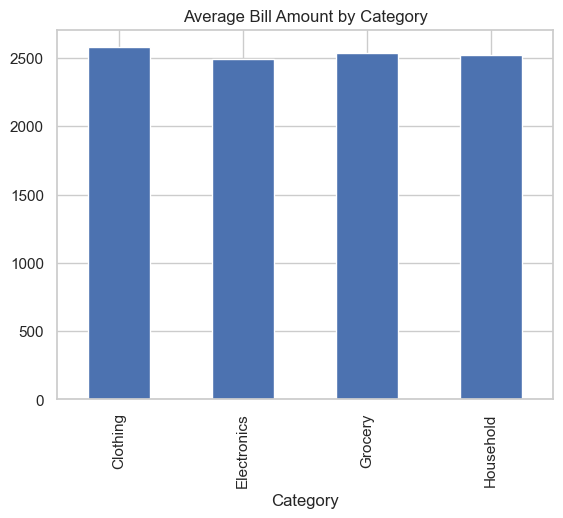

In [28]:
df_store.groupby("Category")["Bill_Amount"].mean().plot(
    kind="bar",
    title="Average Bill Amount by Category"
)
plt.show()


## Histogram (Pandas)

### Plot Type  
Histogram

---

### Description  

A histogram in Pandas is used to visualize the distribution of a numerical variable. It groups data values into intervals (bins) and displays the frequency of observations within each interval. Pandas histograms rely on Matplotlib for rendering, enabling quick and efficient distribution analysis with minimal code.

---

### Dataset Variable Used  

- **Numerical Variable:** `Bill_Amount`  

---

### Insight  

The histogram illustrates the spread and concentration of bill amounts. The distribution helps identify common spending ranges as well as potential skewness or outliers in the data.


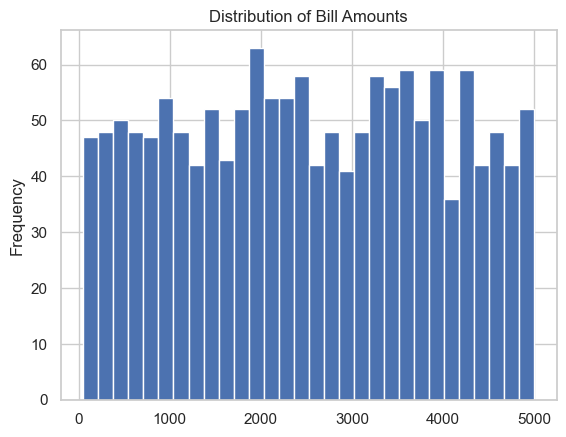

In [29]:
df_store["Bill_Amount"].plot(
    kind="hist",
    bins=30,
    title="Distribution of Bill Amounts"
)
plt.show()


## Documentation Summary & Library Comparison

This section provides a consolidated comparison of the Python visualization libraries covered in this documentation: Matplotlib, Seaborn, Plotly, Bokeh, and Pandas. Each library serves a distinct role within the data visualization ecosystem and is suited to different analytical and presentation requirements.

---

### Matplotlib

Matplotlib is the foundational visualization library in Python and offers complete control over every element of a plot.

**Primary Focus:**  
Low-level, fully customizable static visualizations

**Strengths:**
- Fine-grained control over axes, labels, colors, layouts, and annotations  
- Suitable for publication-quality figures and academic reports  
- Acts as the base library for many other visualization tools  

**Limitations:**
- Verbose syntax for complex plots  
- No built-in interactivity  

**Best Suited For:**  
Structured documentation, academic analysis, and scenarios where precise visual customization is required.

---

### Seaborn

Seaborn is built on top of Matplotlib and simplifies statistical and categorical data visualization.

**Primary Focus:**  
Statistical visualization with aesthetic defaults

**Strengths:**
- High-level API with minimal code  
- Automatic aggregation and confidence interval handling  
- Seamless integration with Pandas DataFrames  

**Limitations:**
- Less flexible than Matplotlib for deep customization  
- Static visualizations only  

**Best Suited For:**  
Exploratory Data Analysis (EDA), statistical comparisons, and rapid visualization of structured datasets.

---

### Plotly

Plotly is designed for interactive and web-ready visualizations.

**Primary Focus:**  
Interactive dashboards and exploratory visual analytics

**Strengths:**
- Built-in interactivity (hover, zoom, pan, legend filtering)  
- Clean and expressive API via `plotly.express`  
- Ideal for business dashboards and presentations  

**Limitations:**
- Less control over low-level styling compared to Matplotlib  
- Heavier dependency footprint  

**Best Suited For:**  
Interactive reports, dashboards, and applications where user interaction with data is required.

---

### Bokeh

Bokeh focuses on browser-based interactive visualizations, often backed by Python servers.

**Primary Focus:**  
Web applications and real-time visualizations

**Strengths:**
- Strong support for server-side interactivity  
- Suitable for large datasets and streaming data  
- Designed for deployment in web environments  

**Limitations:**
- More verbose syntax than Plotly  
- Steeper learning curve for beginners  

**Best Suited For:**  
Web applications, live dashboards, and interactive data systems.

---

### Pandas

Pandas provides simple plotting capabilities as wrappers around Matplotlib.

**Primary Focus:**  
Quick exploratory visualization

**Strengths:**
- Extremely concise syntax  
- Ideal for fast checks during data cleaning and exploration  
- Integrated directly into DataFrame workflows  

**Limitations:**
- Limited customization options  
- No interactivity  
- Not suitable for presentation-quality visuals  

**Best Suited For:**  
Quick EDA and preliminary data inspection.

---

### Comparison Table (Extended Summary)

| Library     | Primary Focus       | Ease of Use | Customization | Interactivity | Typical Use Case     |
|------------|---------------------|-------------|---------------|---------------|----------------------|
| Matplotlib | Full control        | Moderate    | Very High     | ❌            | Reports, research    |
| Seaborn    | Statistical visuals | Easy        | Medium        | ❌            | EDA, comparisons     |
| Plotly     | Dashboards          | Easy        | Medium        | ✅            | Interactive apps     |
| Bokeh      | Web applications    | Moderate    | High          | ✅            | Live dashboards      |
| Pandas     | Quick EDA           | Very Easy   | Low           | ❌            | Fast inspection      |



<hr>
<div align="center"><strong>End of Report</strong></div>
<hr>
